# Group members: Muhammad Asad Bilal Arif L1F17BSCS0439


# Muhammad Hassan L1F17BSCS0462

In [16]:
import pandas as pd

data = pd.read_csv("Rainfall_1901_2016_PAK.csv")

data

,Rainfall - (MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
...,...,...,...
1387,60.60610,2016,August
1388,13.76940,2016,September
1389,1.07552,2016,October
1390,2.88480,2016,November


In [3]:
data['Rainfall - (MM)'].describe()

count    1392.000000
mean       25.142392
std        22.239632
min         0.105840
25%         9.586635
50%        19.653750
75%        33.753075
max       154.055000
Name: Rainfall - (MM), dtype: float64

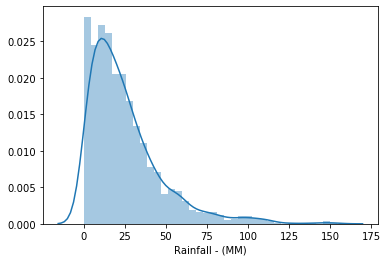

In [4]:
import seaborn as sns

sns.distplot(data['Rainfall - (MM)'])


In [17]:
def Convert(x):
    if x == 'January':
        return 1
    if x == 'February':
        return 2
    if x == 'March':
        return 3
    if x == 'April':
        return 4
    if x == 'May':
        return 5
    if x == 'June':
        return 6
    if x == 'July':
        return 7
    if x == 'August':
        return 8
    if x == 'September':
        return 9
    if x == 'October':
        return 10
    if x == 'November':
        return 11
    if x == 'December':
        return 12


data['Month'] = data['Month'].apply(Convert)
print("Convert Months data into Numarical form")
data


Convert Months data into Numarical form


,Rainfall - (MM),Year,Month
0,40.42580,1901,1
1,12.30220,1901,2
2,25.51190,1901,3
3,14.29420,1901,4
4,38.30460,1901,5
...,...,...,...
1387,60.60610,2016,8
1388,13.76940,2016,9
1389,1.07552,2016,10
1390,2.88480,2016,11


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


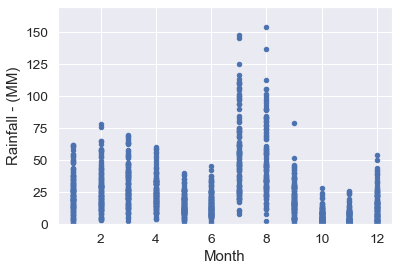

In [18]:
var = 'Month'
data1 = pd.concat([data['Rainfall - (MM)'], data[var]], axis=1)
data1.plot.scatter(x=var, y='Rainfall - (MM)', ylim=(0,170));

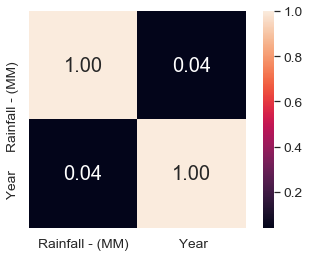

In [19]:
import numpy as np
import matplotlib.pyplot as plt
corrmat = data.corr()
k = 2 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Rainfall - (MM)')['Rainfall - (MM)'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


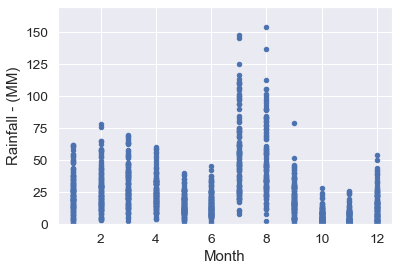

In [20]:
var = 'Month'
data1 = pd.concat([data['Rainfall - (MM)'], data[var]], axis=1)
data1.plot.scatter(x=var, y='Rainfall - (MM)', ylim=(0,170));

# Q 1: In which Months Rainfall is greatest? 

## From Above graph we came to know that in the months of July and August the rainfall in gratest

# Q 2: In which Months Rainfall is less? 

## From Above graph we came to know that in the months of October and November the rainfall in less

In [32]:
data.rename(columns={'Rainfall - (MM)':'Rainfall-(mm)',' Year':'Year'},inplace=True)
data.columns

Index(['Rainfall-(mm)', 'Year', 'Month'], dtype='object')

In [49]:
import plotly.express as px
plt.figure(figsize=(15,8))
graph=px.bar(data.loc[(data.Year>=1990)],x="Year",y="Rainfall-(mm)",hover_name='Month',color='Month',title='Rainfall During 2000 to 2016')
graph.show()

<Figure size 1080x576 with 0 Axes>

In [47]:
graph=px.line(data.loc[(data.Year>=1995)].loc[(data.Year<=2004)],x='Year',y='Rainfall-(mm)',color='Month',title='Rainfall in Year 1995 to 2004 ')
graph.show()


In [46]:
graph=px.line(data.loc[(data.Year>=2005)].loc[(data.Year<=2017)],x='Year',y='Rainfall-(mm)',color='Month',title='Rainfall in Year 2005 to 2016 ')
graph.show()

# Q 3: Compare Rainfall in the months of July and August

### From above graphs we see that pattran of rain in graph that is from 1995 to 2004 in more rainfall in July than August but in next graph which is from 2005 to 2016 more rainfall in August than july  

# Q 4:Compare Rainfall in the months of November and December¶

###  From above graphs we see that pattran of rain in graph that is from 1995 to 2004 in more More rainfall in November than December but in next graph which is from 2005 to 2016 more rainfall in December than November

# Q 5:Compare Rainfall in the Summer and Winter

### From above graphs we see more rainfall in summer (July and August ) than than winter (November and December)

In [18]:
from sklearn.model_selection import train_test_split

X=data.iloc[:,1:]
Y=data.iloc[:,:1]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [19]:
data.dtypes

Rainfall - (MM)    float64
Month                int64
dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("There is no missing value in data")
missing_data.head()

There is no missing value in data


,Total,Percent
Month,0,0.0
Rainfall - (MM),0,0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)